<a href="https://colab.research.google.com/github/jherrerae/Classification-for-Delivered-Products/blob/main/Project_2_Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np

In [3]:
filename="/content/drive/MyDrive/Coding Dojo/Classes/Datasets/E-Commerce Shipping Data_Train.csv"
df=pd.read_csv(filename)
df.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.shape

(10999, 12)

First choice: dataset 1

1) Source of data

Kaggle
https://www.kaggle.com/datasets/prachi13/customer-analytics

2) Brief description of data

An international e-commerce company based wants to discover key insights from their customer database.

3) What is the target?

Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.


4) Is this a classification or regression problem?

Classification

5) How many features?

12 columns

6) How many rows of data.

10999

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?

combination of categorical and numerical values, evaluate if variables hshould be taken into account in the model

#Data Dictionary
ID: ID Number of Customers.

Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.

Customer care calls: The number of calls made from enquiry for enquiry of the shipment.

Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

Cost of the product: Cost of the Product in US Dollars.

Prior purchases: The Number of Prior Purchase.

Product importance: The company has categorized the product in the various parameter such as low, medium, high.

Gender: Male and Female.

Discount offered: Discount offered on that specific product.
Weight in gms: It is the weight in grams.

Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

#Data Formatting


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
#duplicated values
df.duplicated().sum()

0

In [7]:
#Checking for inconsistencies in names for each categorical column

dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index

for col in str_cols:
    print(f"- Column= {col}")
    print(df[col].value_counts(dropna=False))
    print('\n\n')

- Column= Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64



- Column= Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64



- Column= Product_importance
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64



- Column= Gender
F    5545
M    5454
Name: Gender, dtype: int64





No duplicated values or missing values.

Categorical features look good. No inconsistencies found. 

In [8]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


#Data Viz

In [9]:
plt.style.use('seaborn')
#Use seaborn style for plots

##Target

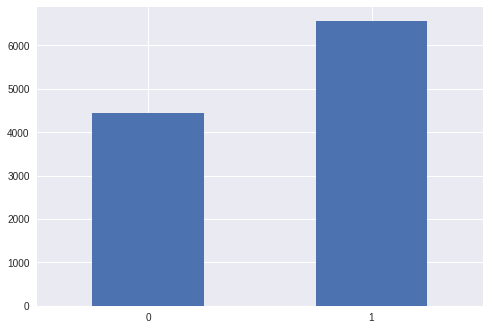

In [10]:
df['Reached.on.Time_Y.N'].value_counts().sort_values().plot(kind = 'bar').tick_params(axis='x', rotation=0)

plt.show()


Class balance looks ok

##Features

###Numerical

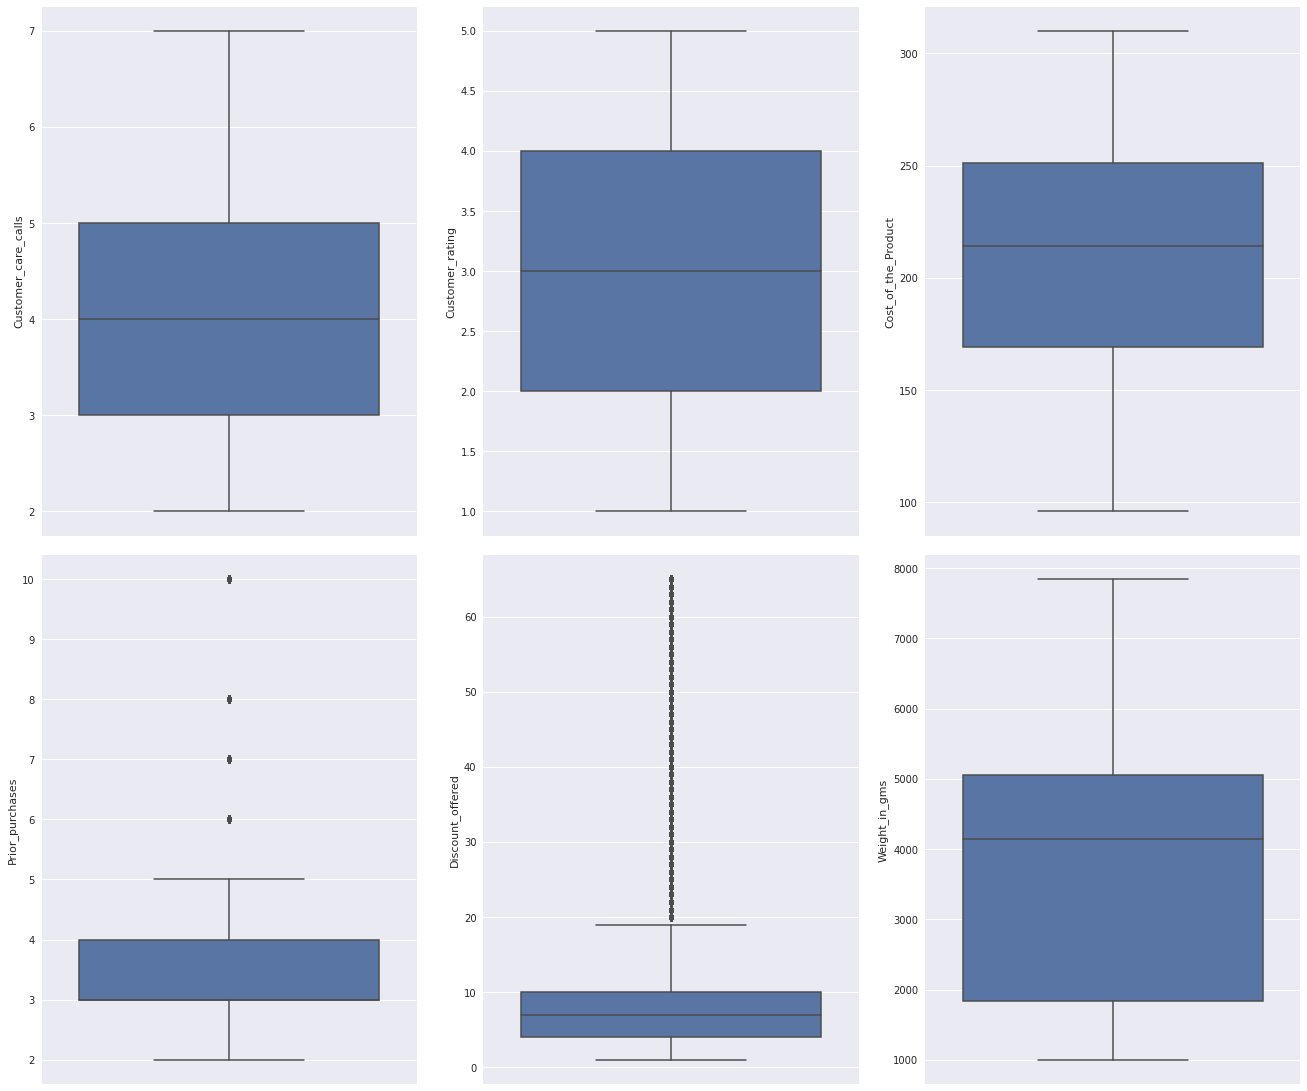

In [11]:
fig, axs = plt.subplots(squeeze=False,nrows=2,ncols=3)
fig.set_size_inches(18.5, 15.5)
sns.set(font_scale = 1.5)
a=sns.boxplot(data=df, y='Customer_care_calls',ax=axs[0,0])
b=sns.boxplot(data=df, y='Customer_rating',ax=axs[0,1])
c=sns.boxplot(data=df, y='Cost_of_the_Product',ax=axs[0,2])
d=sns.boxplot(data=df, y='Prior_purchases',ax=axs[1,0])
f=sns.boxplot(data=df, y='Discount_offered',ax=axs[1,1])
c=sns.boxplot(data=df, y='Weight_in_gms',ax=axs[1,2])
fig.tight_layout()
plt.show;

There are several outliers for Prior_purchases and Discount_offered

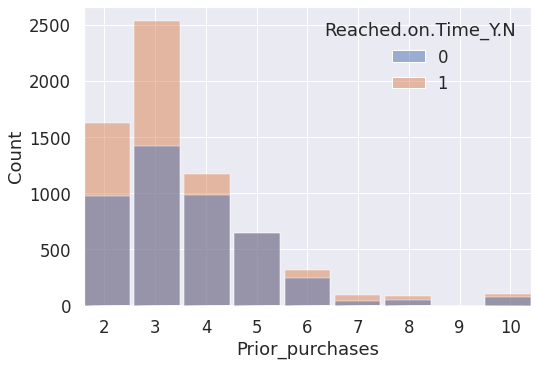

In [12]:
pp=sns.histplot(data=df,x="Prior_purchases",hue='Reached.on.Time_Y.N');

#Source
#https://stackoverflow.com/questions/34888058/changing-width-of-bars-in-bar-chart-created-using-seaborn-factorplot

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(pp, .9)

plt.show()

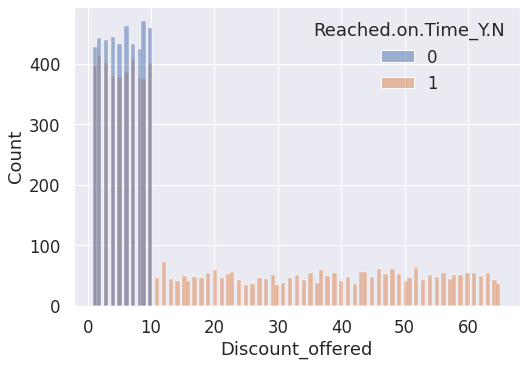

In [13]:
er=sns.histplot(data=df,x="Discount_offered",hue='Reached.on.Time_Y.N');

#Source
#https://stackoverflow.com/questions/34888058/changing-width-of-bars-in-bar-chart-created-using-seaborn-factorplot
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(er, .7)

plt.show()

Data is skewed right for Prior_purchases and Discount_offered.

Discount_offered is where the data is more spread having discounts over 50$

Additionally, all the products with a higher discount did not arrive on time

###Categorical

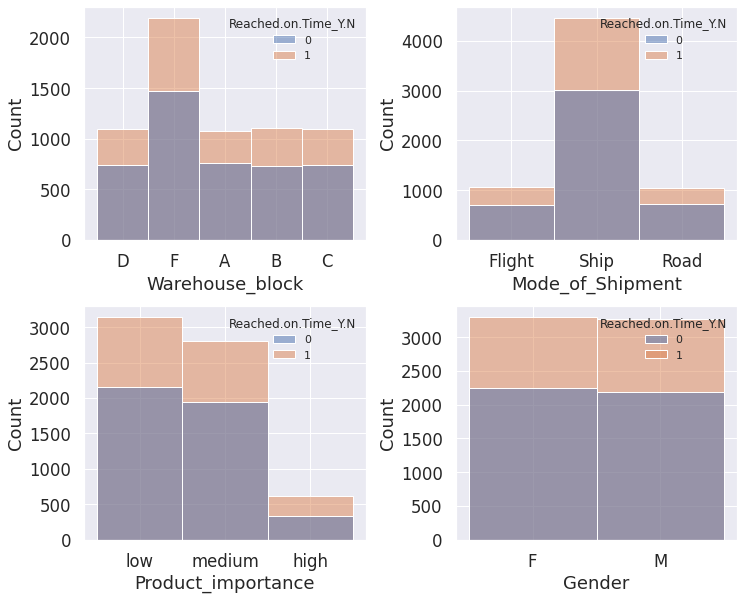

In [14]:
fig, axs = plt.subplots(squeeze=False,nrows=2,ncols=2)
fig.set_size_inches(10.5, 8.5)
sns.set(font_scale = 1)
a=sns.histplot(data=df, x='Warehouse_block',ax=axs[0,0],hue='Reached.on.Time_Y.N')
b=sns.histplot(data=df, x='Mode_of_Shipment',ax=axs[0,1],hue='Reached.on.Time_Y.N')
c=sns.histplot(data=df, x='Product_importance',ax=axs[1,0],hue='Reached.on.Time_Y.N')
d=sns.histplot(data=df, x='Gender',ax=axs[1,1],hue='Reached.on.Time_Y.N')
fig.tight_layout()

plt.show;

##Exploratory Analysis

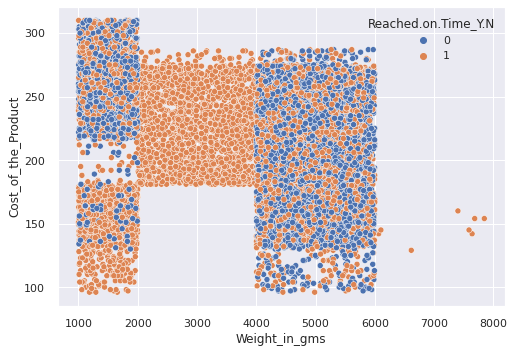

In [15]:
sns.scatterplot(data=df,x="Weight_in_gms",y="Cost_of_the_Product",hue="Reached.on.Time_Y.N")

Analyzing the graph above the distribution of Cost vs weight, there are some things to notice

All the products that arrive on time are between 1kg and 2kg and between 4kg and 6kg

All the products between 2kg and 4kg did not arrive on time.

The highest avg cost of products is for the ones that weight between 2kg and 4kg

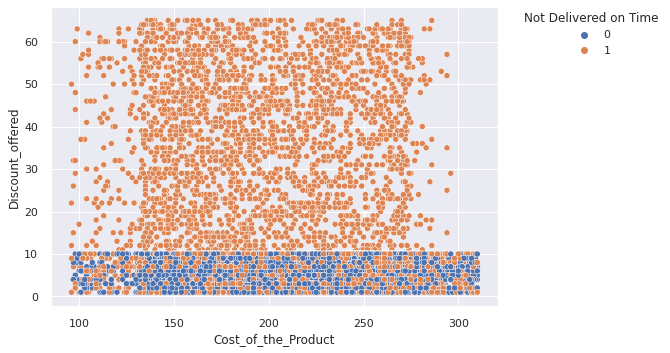

In [16]:
sns.scatterplot(data=df,x="Cost_of_the_Product",y='Discount_offered',hue="Reached.on.Time_Y.N")
plt.legend(bbox_to_anchor=(1.05, 1),  borderaxespad=0,title="Not Delivered on Time")


The graph above shows that all the products that arrive on time had a discount lower than 10$ and the cost of the product didn't matter to be delivered on time or not.

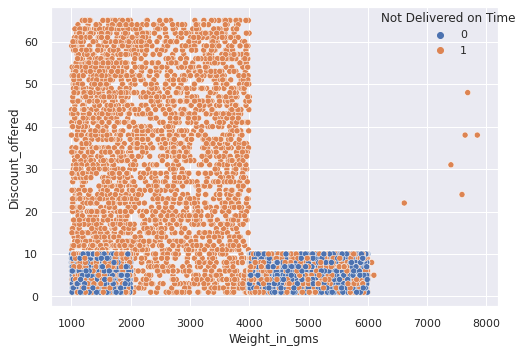

In [17]:
sns.scatterplot(data=df,x="Weight_in_gms",y='Discount_offered',hue="Reached.on.Time_Y.N")
plt.legend(bbox_to_anchor=(1.05, 1),  borderaxespad=0,title="Not Delivered on Time");


The grapha above also shows some interesting patterns. All the products delivered on time have discount of 10$ or less and have a weight between 1kg and 2kg or between 4kg and 6kg.

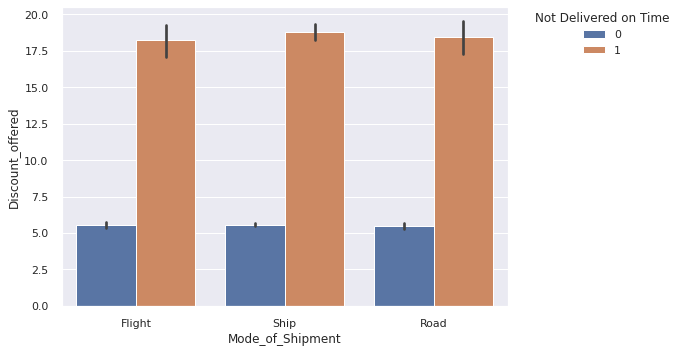

In [18]:
sns.barplot(data=df,x="Mode_of_Shipment",y='Discount_offered',hue="Reached.on.Time_Y.N")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title="Not Delivered on Time")



THe bar graph above shows that the products that arrive on time are directly correlated to the discount and the mode of shipment is not making a difference.

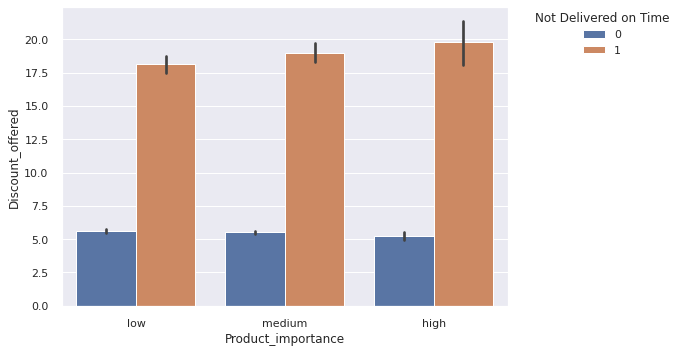

In [19]:
sns.barplot(data=df,x="Product_importance",y='Discount_offered',hue="Reached.on.Time_Y.N")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title="Not Delivered on Time")

Same as the graph before this one, the products that arrive on time are directly correlated to the discount and the product importance is not making a difference to products arriving on time.

The outliers found were in discount_offered and are relate to the items that didn't arrive on time.

Additionally ID column will be dropped for classification, given that is an ID it should not be included.


In [20]:
df=df.drop(columns=['ID'])

#Renaming Target column
df=df.rename(columns = {'Reached.on.Time_Y.N':'Not_on_Time'})
df.head(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Not_on_Time
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


#Machine Learning Model

Setting Up Libraries neeed for Machine Learning Model

In [69]:

from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,roc_auc_score,RocCurveDisplay
from sklearn.metrics import recall_score,accuracy_score,precision_score, classification_report, plot_confusion_matrix,PrecisionRecallDisplay

from sklearn import set_config
set_config(display='diagram')


In [22]:
# split X and y
X = df.drop(columns=['Not_on_Time'])
y = df['Not_on_Time']

# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


Defining Pipeline for preprocessing.

Scaling for numerical data and OHE for categorical features

In [23]:
# instantiate the column selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

#instantiate the encoder
scaler = StandardScaler()
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

#si son varias funciones aqui se hace otro pipeline para meterlas todas en una sola

num_tuple = (scaler, num_selector)
cat_tuple = (encoder, cat_selector)

preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder = 'drop')

**Metric used to measure model Success will be Recall**

Based in the business case that is being analyzed the most important is to classify correctly which products will not arrive on time to avoid any missunderstangins with customers as well as any additional cost caused by the extra time to deliver the product


The 3 models used for this exercise will be XGBoost, Logistic Regression and KNN. Additionally every model will be tested with a PCA that gets 85% of the variance

##XGBoost Model

In [109]:
#XGBoost Model

xgb=XGBClassifier()

# combine the preprocessor object and the  model in a pipeline

xgb_model=make_pipeline(preprocessor,xgb)
xgb_model.fit(X_train,y_train);


scores = cross_val_score(xgb_model, X_train, y_train, cv=5,scoring="recall")
print(f'Recall scores for each fold are: {scores.round(2)}')
print(f'Average Recall across folds is {round(np.mean(scores),4)}\n')

Recall scores for each fold are: [0.57 0.53 0.52 0.52 0.55]
Average Recall across folds is 0.5384



In [110]:
xgb_model.get_params()

{'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb1eb0ea510>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb1eb0ea550>)]),
 'columntransformer__n_jobs': None,
 'columntransformer__onehotencoder': OneHotEncoder(handle_unknown='ignore', sparse=False),
 'columntransformer__onehotencoder__categories': 'auto',
 'columntransformer__onehotencoder__drop': None,
 'columntransformer__onehotencoder__dtype': numpy.float64,
 'columntransformer__onehotencoder__handle_unknown': 'ignore',
 'columntransformer__onehotencoder__sparse': False,
 'columntransformer__remainder': 'drop',
 'columntransformer__sparse_thre

In [111]:
depths=range(3,9)

param_grid = {'xgbclassifier__max_depth': depths,
              'xgbclassifier__gamma': [ 0.1,0.2,0,0.3,0.4,0.5,],
              'xgbclassifier__min_child_weight':range(1,6,2),
              'xgbclassifier__reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
              }

In [112]:
%%time
xgb_model_gs = GridSearchCV(xgb_model, param_grid,scoring="recall")
 
xgb_model_gs.fit(X_train, y_train)
print('Best Best XGBoost Parameters:')
print(xgb_model_gs.best_params_)
xbg_model_tunned = xgb_model_gs.best_estimator_

print(f'Recall of best XGBoost model is: {recall_score(y_test,xbg_model_tunned.predict(X_test))}\n')

scores = cross_val_score(xbg_model_tunned, X_train, y_train, cv=5,scoring="recall")

print(f'Recall scores for each fold are: {scores.round(2)}')
print(f'Average Recall across folds is {round(np.mean(scores),4)}\n')





Best Best XGBoost Parameters:
{'xgbclassifier__gamma': 0.2, 'xgbclassifier__max_depth': 8, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__reg_alpha': 0.05}
Recall of best XGBoost model is: 0.6242424242424243

Recall scores for each fold are: [0.66 0.66 0.63 0.62 0.64]
Average Recall across folds is 0.6395

CPU times: user 35min 5s, sys: 6.25 s, total: 35min 11s
Wall time: 35min 5s


              precision    recall  f1-score   support

     On Time     0.5578    0.7109    0.6251      1100
 Not On Time     0.7641    0.6242    0.6871      1650

    accuracy                         0.6589      2750
   macro avg     0.6609    0.6676    0.6561      2750
weighted avg     0.6816    0.6589    0.6623      2750



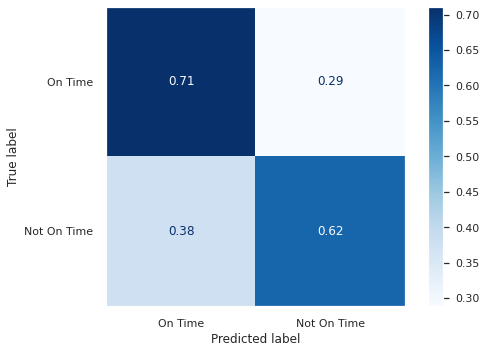

In [119]:
# Plot the confusion matrix
#Normalized Values
labels=['On Time','Not On Time']
ConfusionMatrixDisplay.from_predictions(y_test, xbg_model_tunned.predict(X_test), display_labels=labels,
 cmap='Blues',normalize='true');
plt.grid(False)
print(classification_report(y_test, xbg_model_tunned.predict(X_test),digits=4,target_names=labels))

##Linear Regression

In [53]:
# instantiate a classification model

log_reg =LogisticRegression()

# combine the preprocessor object and the  model in a pipeline

log_reg_model=make_pipeline(preprocessor,log_reg)
log_reg_model.fit(X_train,y_train);


scores = cross_val_score(log_reg_model, X_train, y_train, cv=5,scoring="recall")

print(f'Recall scores for each fold are: {scores.round(2)}')
print(f'Average Recall across folds is {round(np.mean(scores),4)}\n')

Recall scores for each fold are: [0.68 0.67 0.66 0.68 0.69]
Average Recall across folds is 0.6754



In [54]:
log_reg_model.get_params()

{'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb1eb0ea510>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb1eb0ea550>)]),
 'columntransformer__n_jobs': None,
 'columntransformer__onehotencoder': OneHotEncoder(handle_unknown='ignore', sparse=False),
 'columntransformer__onehotencoder__categories': 'auto',
 'columntransformer__onehotencoder__drop': None,
 'columntransformer__onehotencoder__dtype': numpy.float64,
 'columntransformer__onehotencoder__handle_unknown': 'ignore',
 'columntransformer__onehotencoder__sparse': False,
 'columntransformer__remainder': 'drop',
 'columntransformer__sparse_thre

In [55]:
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid = {'logisticregression__C': c_values,
              'logisticregression__penalty': ['l1','l2'],
              'logisticregression__max_iter': [100,500,1000],
              'logisticregression__solver':['liblinear']
              }

In [56]:
%%time

log_reg_model_gs = GridSearchCV(log_reg_model, param_grid,scoring="recall")
 
log_reg_model_gs.fit(X_train, y_train)
print('Best Logistic Regression Parameters:')
print(log_reg_model_gs.best_params_)
log_reg_tunned = log_reg_model_gs.best_estimator_
print(f'Recall of best Logistic Regression model is: {recall_score(y_test,log_reg_tunned.predict(X_test))}\n')

scores = cross_val_score(log_reg_tunned, X_train, y_train, cv=5,scoring="recall")

print(f'Recall scores for each fold are: {scores.round(2)}')
print(f'Average Recall across folds is {round(np.mean(scores),4)}\n')



Best Logistic Regression Parameters:
{'logisticregression__C': 0.0001, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
Recall of best Logistic Regression model is: 0.850909090909091

Recall scores for each fold are: [0.87 0.85 0.84 0.85 0.88]
Average Recall across folds is 0.8571

CPU times: user 29.1 s, sys: 13.7 s, total: 42.7 s
Wall time: 30.4 s


              precision    recall  f1-score   support

     On Time     0.5591    0.2836    0.3764      1100
 Not On Time     0.6405    0.8509    0.7309      1650

    accuracy                         0.6240      2750
   macro avg     0.5998    0.5673    0.5536      2750
weighted avg     0.6080    0.6240    0.5891      2750



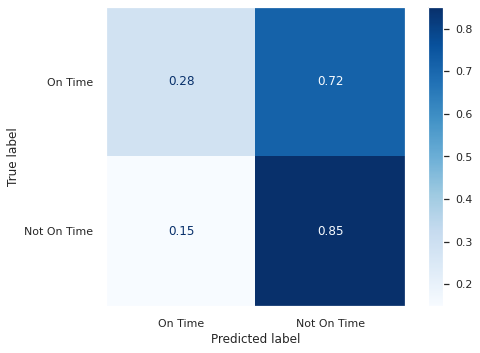

In [57]:
# Plot the confusion matrix
#Normalized Values
labels=['On Time','Not On Time']
ConfusionMatrixDisplay.from_predictions(y_test, log_reg_tunned.predict(X_test), display_labels=labels,
 cmap='Blues', normalize='true');
plt.grid(False)
print(classification_report(y_test, log_reg_tunned.predict(X_test),digits=4,target_names=labels))

##KNN Model

In [30]:
# instantiate a classification model

knn=KNeighborsClassifier()

# combine the preprocessor object and the  model in a pipeline

knn_model=make_pipeline(preprocessor,knn)
knn_model.fit(X_train,y_train);


scores = cross_val_score(knn_model, X_train, y_train, cv=5,scoring="recall")

print(f'Recall scores for each fold are: {scores.round(2)}')
print(f'Average Recall across folds is {round(np.mean(scores),4)}\n')




Recall scores for each fold are: [0.72 0.66 0.64 0.65 0.68]
Average Recall across folds is 0.6707



In [31]:
param_grid = {'kneighborsclassifier__n_neighbors': range(1,10),
              'kneighborsclassifier__leaf_size': range(1,5),
              'kneighborsclassifier__p': range(1,2),
              }

In [32]:
%%time
knn_model_gs = GridSearchCV(knn_model, param_grid,scoring="recall")
 
knn_model_gs.fit(X_train, y_train)
print('Best KNN Parameters:')
print(knn_model_gs.best_params_)
knn_model_tunned = knn_model_gs.best_estimator_
print(f'Recall of best KNN model is: {recall_score(y_test,knn_model_tunned.predict(X_test))}\n')

scores = cross_val_score(knn_model_tunned, X_train, y_train, cv=5,scoring="recall")

print(f'Recall scores for each fold are: {scores.round(2)}')
print(f'Average Recall across folds is {round(np.mean(scores),4)}\n')



Best KNN Parameters:
{'kneighborsclassifier__leaf_size': 1, 'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__p': 1}
Recall of best KNN model is: 0.6606060606060606

Recall scores for each fold are: [0.7  0.66 0.65 0.66 0.68]
Average Recall across folds is 0.6705

CPU times: user 58.7 s, sys: 612 ms, total: 59.3 s
Wall time: 1min


              precision    recall  f1-score   support

     On Time     0.5298    0.5736    0.5509      1100
 Not On Time     0.6992    0.6606    0.6793      1650

    accuracy                         0.6258      2750
   macro avg     0.6145    0.6171    0.6151      2750
weighted avg     0.6314    0.6258    0.6279      2750



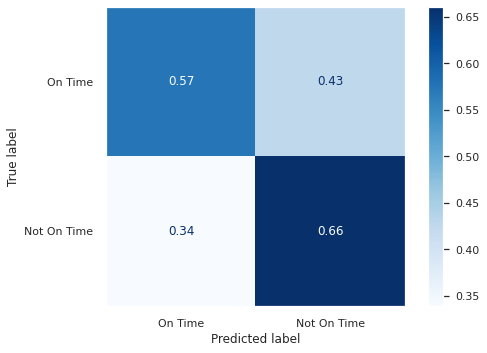

In [33]:
# Plot the confusion matrix
#Normalized Values
labels=['On Time','Not On Time']
ConfusionMatrixDisplay.from_predictions(y_test, knn_model_tunned.predict(X_test), display_labels=labels,
 cmap='Blues', normalize='true');
plt.grid(False)
print(classification_report(y_test, knn_model_tunned.predict(X_test),digits=4,target_names=labels))

#MODELS with PCA

In [114]:
pca85 = PCA(n_components=.85)

##XGBoost

In [115]:
xgb_model_pca=make_pipeline(preprocessor,pca85,xgb)


xgb_model_pca.fit(X_train,y_train);


scores = cross_val_score(xgb_model_pca, X_train, y_train, cv=5,scoring='recall')
print(f'Recall scores for each fold are: {scores.round(2)}')
print(f'Average Recall across folds is {round(np.mean(scores),4)}\n')

Recall scores for each fold are: [0.61 0.56 0.58 0.56 0.59]
Average Recall across folds is 0.5793



In [116]:

depths=range(3,9)

param_grid = {'xgbclassifier__max_depth': depths,
              'xgbclassifier__gamma': [ 0.1,0.2,0,0.3,0.4,0.5,],
              'xgbclassifier__min_child_weight':range(1,6,2),
              'xgbclassifier__reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
              }

In [117]:
%%time
xgb_model_gs_PCA = GridSearchCV(xgb_model_pca, param_grid,scoring='recall')
 
xgb_model_gs_PCA.fit(X_train, y_train)
print('Best XGBoost Parameters:')
print(xgb_model_gs_PCA.best_params_)
xbg_model_tunned_PCA = xgb_model_gs_PCA.best_estimator_

print(f'Recall of best XGBoost model is: {recall_score(y_test,xbg_model_tunned_PCA.predict(X_test))}\n')

scores = cross_val_score(xbg_model_tunned_PCA, X_train, y_train, cv=5,scoring='recall')

print(f'Recall scores for each fold are: {scores.round(2)}')
print(f'Average Recall across folds is {round(np.mean(scores),4)}\n')



Best XGBoost Parameters:
{'xgbclassifier__gamma': 0.1, 'xgbclassifier__max_depth': 8, 'xgbclassifier__min_child_weight': 5, 'xgbclassifier__reg_alpha': 0.001}
Recall of best XGBoost model is: 0.6363636363636364

Recall scores for each fold are: [0.69 0.62 0.64 0.64 0.65]
Average Recall across folds is 0.6487

CPU times: user 44min 25s, sys: 6min 35s, total: 51min
Wall time: 43min 35s


              precision    recall  f1-score   support

     On Time     0.5575    0.6873    0.6156      1100
 Not On Time     0.7532    0.6364    0.6899      1650

    accuracy                         0.6567      2750
   macro avg     0.6554    0.6618    0.6528      2750
weighted avg     0.6749    0.6567    0.6602      2750



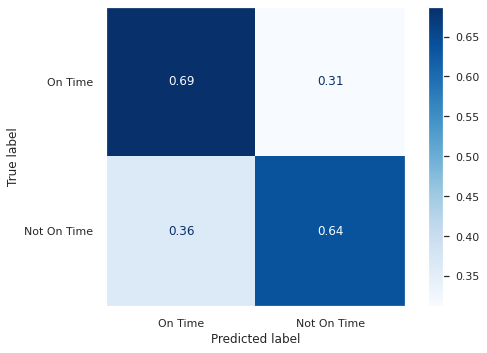

In [118]:
# Plot the confusion matrix
#Normalized Values
labels=['On Time','Not On Time']
ConfusionMatrixDisplay.from_predictions(y_test, xbg_model_tunned_PCA.predict(X_test), display_labels=labels,
cmap='Blues', normalize='true');
plt.grid(False)

print(classification_report(y_test, xbg_model_tunned_PCA.predict(X_test),digits=4,target_names=labels))

##Logistic Regression

In [37]:
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid = {'logisticregression__C': c_values,
              'logisticregression__penalty': ['l1','l2'],
              'logisticregression__max_iter': [100,500,1000],
              'logisticregression__solver':['liblinear']
              }

In [40]:
lr_model_pca=make_pipeline(preprocessor,pca85,log_reg)

lr_model_pca.fit(X_train,y_train);


scores = cross_val_score(lr_model_pca, X_train, y_train, cv=5,scoring='recall')
print(f'Recall scores for each fold are: {scores.round(2)}')
print(f'Recall accuracy across folds is {round(np.mean(scores),4)}\n')

Recall scores for each fold are: [0.69 0.67 0.67 0.68 0.69]
Recall accuracy across folds is 0.6784



In [41]:
%%time

log_reg_model_gs_PCA = GridSearchCV(lr_model_pca, param_grid,scoring="recall")
 
log_reg_model_gs_PCA.fit(X_train, y_train)
print('Best Logistic Regression Parameters:')
print(log_reg_model_gs_PCA.best_params_)
log_reg_tunned_PCA = log_reg_model_gs_PCA.best_estimator_
print(f'Recall of best Logistic Regression  model is: {recall_score(y_test,log_reg_tunned_PCA.predict(X_test))}\n')

scores = cross_val_score(log_reg_tunned_PCA, X_train, y_train, cv=5,scoring="recall")

print(f'Recall scores for each fold are: {scores.round(2)}')
print(f'Average Recall across folds is {round(np.mean(scores),4)}\n')

Best Logistic Regression Parameters:
{'logisticregression__C': 0.01, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
Recall of best Logistic Regression  model is: 0.6872727272727273

Recall scores for each fold are: [0.69 0.67 0.66 0.67 0.7 ]
Average Recall across folds is 0.6798

CPU times: user 17.1 s, sys: 13.8 s, total: 30.9 s
Wall time: 16 s


              precision    recall  f1-score   support

     On Time     0.5563    0.5882    0.5718      1100
 Not On Time     0.7146    0.6873    0.7006      1650

    accuracy                         0.6476      2750
   macro avg     0.6354    0.6377    0.6362      2750
weighted avg     0.6513    0.6476    0.6491      2750



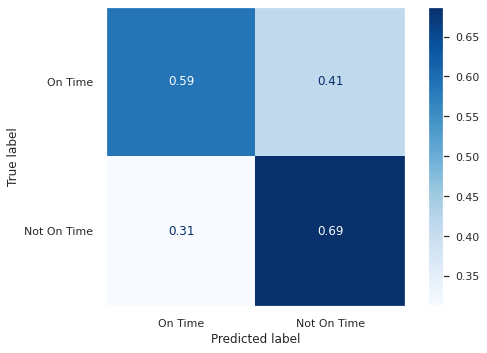

In [42]:
# Plot the confusion matrix
#Normalized Values
labels=['On Time','Not On Time']
ConfusionMatrixDisplay.from_predictions(y_test, log_reg_tunned_PCA.predict(X_test), display_labels=labels,
cmap='Blues', normalize='true');
plt.grid(False)

print(classification_report(y_test, log_reg_tunned_PCA.predict(X_test),digits=4,target_names=labels))

##KNN

In [43]:
knn_model_pca=make_pipeline(preprocessor,pca85,knn)
knn_model_pca.fit(X_train,y_train);


scores = cross_val_score(knn_model_pca, X_train, y_train, cv=5,scoring="recall")

print(f'Recall scores for each fold are: {scores.round(2)}')
print(f'Average Recall across folds is {round(np.mean(scores),4)}\n')

Recall scores for each fold are: [0.71 0.66 0.65 0.66 0.65]
Average Recall across folds is 0.665



In [44]:
param_grid = {'kneighborsclassifier__n_neighbors': range(1,10),
              'kneighborsclassifier__leaf_size': range(1,5),
              'kneighborsclassifier__p': range(1,2),
              }

In [45]:
%%time
knn_model_gs_PCA = GridSearchCV(knn_model_pca, param_grid)
 
knn_model_gs_PCA.fit(X_train, y_train)
print('Best KNN Parameters:')

print(knn_model_gs_PCA.best_params_)

knn_model_tunned_PCA = knn_model_gs_PCA.best_estimator_

print(f'Recall of best KNN model is: {recall_score(y_test,knn_model_tunned_PCA.predict(X_test))}\n')

scores = cross_val_score(knn_model_tunned_PCA, X_train, y_train, cv=5,scoring="recall")

print(f'Recall scores for each fold are: {scores.round(2)}')
print(f'Average Recall across folds is {round(np.mean(scores),4)}\n')

Best KNN Parameters:
{'kneighborsclassifier__leaf_size': 1, 'kneighborsclassifier__n_neighbors': 8, 'kneighborsclassifier__p': 1}
Recall of best KNN model is: 0.5842424242424242

Recall scores for each fold are: [0.62 0.6  0.57 0.6  0.58]
Average Recall across folds is 0.5925

CPU times: user 1min 1s, sys: 22.8 s, total: 1min 24s
Wall time: 1min 4s


              precision    recall  f1-score   support

     On Time     0.5508    0.7645    0.6403      1100
 Not On Time     0.7882    0.5842    0.6711      1650

    accuracy                         0.6564      2750
   macro avg     0.6695    0.6744    0.6557      2750
weighted avg     0.6932    0.6564    0.6588      2750



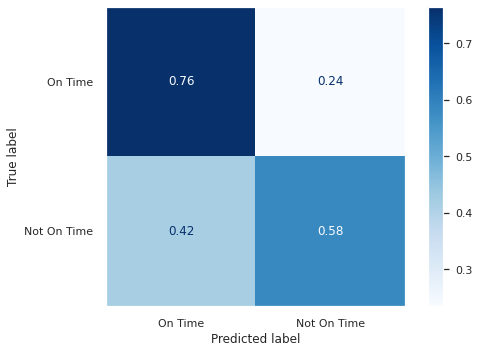

In [46]:
# Plot the confusion matrix
#Normalized Values
labels=['On Time','Not On Time']
ConfusionMatrixDisplay.from_predictions(y_test, knn_model_tunned_PCA.predict(X_test), display_labels=labels,
 cmap='Blues', normalize='true');
plt.grid(False)
print(classification_report(y_test, knn_model_tunned_PCA.predict(X_test),digits=4,target_names=labels))

#Final Model

The final model select model is a Logistic Regression, based in the recall obtain from the GridSearch and the cross validation.

In [58]:
log_reg_tunned

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb1eabf5810>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb1eac32390>)])),
                ('logisticregression',
                 LogisticRegression(C=0.0001, solver='liblinear'))])

The following procedure is to determined if by using a different treshold a better result can be obtain.

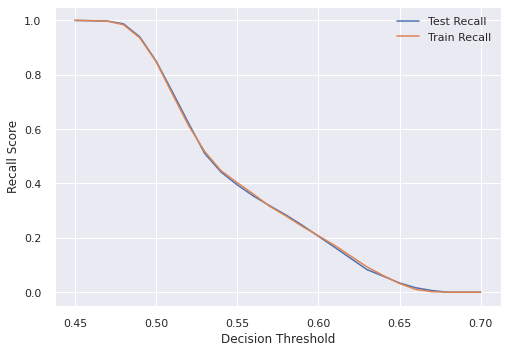

In [82]:
train_probs = log_reg_tunned.predict_proba(X_train)
test_probs = log_reg_tunned.predict_proba(X_test)

#Defining different tresholds to tests
thresholds = np.array(range(45,71,1)) / 100

score_df = pd.DataFrame(index=thresholds, columns=['Test Recall'])

for thresh in thresholds:
  thresh = thresh 
  train_thresh = [1 if x[1] > thresh else 0 for x in train_probs]
  test_thresh = [1 if x[1] > thresh else 0 for x in test_probs]

  score_df.loc[thresh, 'Train Recall'] = recall_score(y_train,train_thresh)
  score_df.loc[thresh, 'Test Recall'] = recall_score(y_test,test_thresh )

score_df.plot();
plt.xlabel('Decision Threshold');
plt.ylabel('Recall Score');

In [83]:
score_df.sort_values(by='Test Recall', ascending=False)

,Test Recall,Train Recall
0.45,1.0,1.000000
0.46,0.998788,0.999186
0.47,0.997576,0.997150
0.48,0.987273,0.984124
0.49,0.939394,0.935884
0.50,0.850909,0.848565
0.51,0.738182,0.730104
0.52,0.622424,0.613882
0.53,0.510303,0.517606
0.54,0.442424,0.447384


By looking at the table above the treshold that will be tested besides the default (.5) will be .49

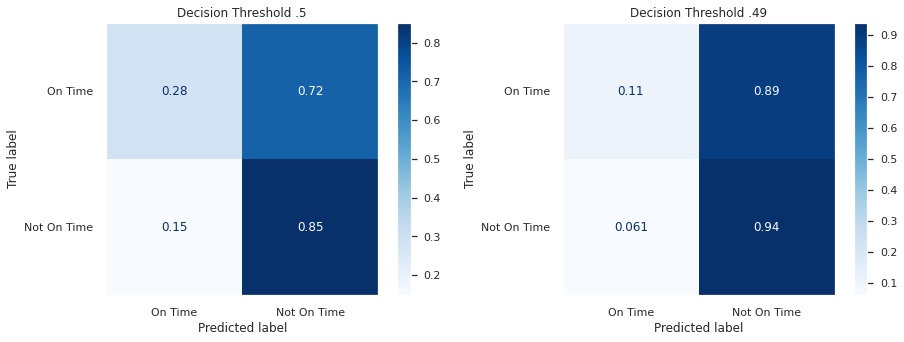

In [107]:
test_thresh_49 = [1 if x[1] > .49 else 0 for x in test_probs]


fig, axes = plt.subplots(1,2, figsize=(15,5))
plt.grid(False)
ConfusionMatrixDisplay.from_predictions(y_test, log_reg_tunned.predict(X_test), 
  cmap='Blues', display_labels=labels,normalize='true',ax=axes[0])

axes[0].grid(False)
axes[0].set_title('Decision Threshold .5')

labels=['On Time','Not On Time']
ConfusionMatrixDisplay.from_predictions(y_test, test_thresh_49, display_labels=labels,
 cmap='Blues',normalize='true',ax=axes[1]);
axes[1].set_title('Decision Threshold .49')

axes[1].grid(False)


By looking at the confusion matrix above, even though the recall score improves greatly the decrease in of false positives is not worth it for our model. Because flagging a lot of products as late could biased some decisions. Additionally, to even improve the decision ideally more cost information is needed to determine if the change in treshold really matter and what should be the correct value.

The production model selected is a Logistic Regression Model using a treshold of 50%. This production model works great to determine which products will arrive late.